In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Read and Review the dataset for churn 

### Read csv file

In [2]:
print(os.path.exists("variant_1.csv"))

True


In [3]:
df = pd.read_csv("variant_1.csv")

In [4]:
print('columns count - ',len(df.columns), '\n')
print('columns: ',list(df.columns))

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [5]:
print('Samples count: ',df.shape[0])

Samples count:  148670


In [6]:
df.head(5)

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


### Check missing data

In [7]:
print("Any missing sample in training set:",df.isnull().values.any())

Any missing sample in training set: True


In [8]:
for col in df.columns:
    if df[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [9]:
missing = list()
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


### Unique values count

In [10]:
# Підрахунок кількості унікальних значень для всіх колонок
unique_values_count_all_columns = df.nunique()

print("Кількість унікальних значень для кожної колонки:")
print(unique_values_count_all_columns)

# Отримання унікальних значень для кожної колонки
unique_values_all_columns = {column: df[column].unique() for column in df.columns}

print("\nУнікальні значення для кожної колонки:")
for column, unique_values in unique_values_all_columns.items():
    print(f"{column}: {unique_values}")

Кількість унікальних значень для кожної колонки:
Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score   

### Distribution statistics

In [11]:
df.describe().round(2)

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.00,148670.00,148670.0,148670.00,112231.00,112031.00,109028.00,148629.00,133572.00,139520.00,148670.00,133572.00,148670.00
mean,74334.50,99224.50,2019.0,331117.74,4.05,0.44,3225.00,335.14,497893.47,6957.34,699.79,72.75,0.25
std,42917.48,42917.48,0.0,183909.31,0.56,0.51,3251.12,58.41,359935.32,6496.59,115.88,39.97,0.43
min,0.00,24890.00,2019.0,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,0.97,0.00
25%,37167.25,62057.25,2019.0,196500.00,3.62,0.08,581.49,360.00,268000.00,3720.00,599.00,60.47,0.00
50%,74334.50,99224.50,2019.0,296500.00,3.99,0.39,2596.45,360.00,418000.00,5760.00,699.00,75.14,0.00
75%,111501.75,136391.75,2019.0,436500.00,4.38,0.78,4812.50,360.00,628000.00,8520.00,800.00,86.18,0.00
max,148669.00,173559.00,2019.0,3576500.00,8.00,3.36,60000.00,360.00,16508000.00,578580.00,900.00,7831.25,1.00


### Values type descriptions

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

#  Different types of the plots examples

#### Нижче наведені приклади побудови графіків та діаграм різних типів. використовуйте їх для аналізу даних

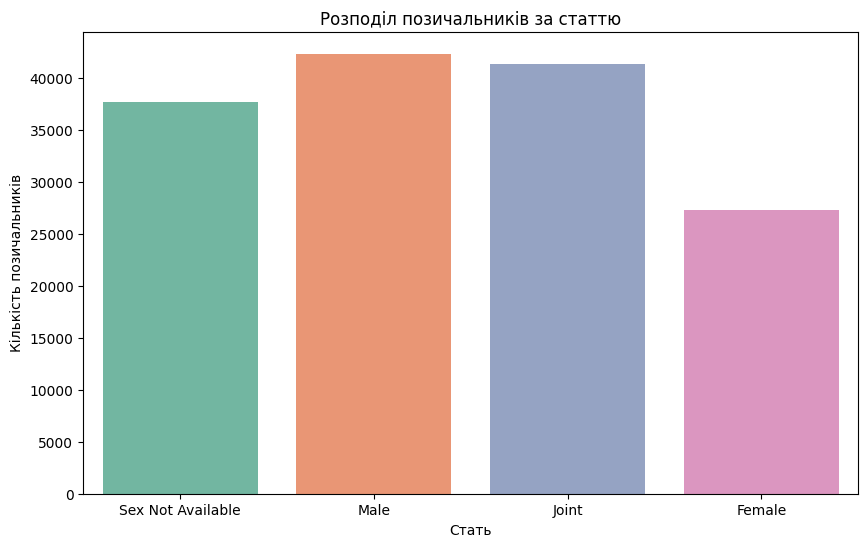

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Gender', data=df, palette='Set2', legend=False)
plt.title('Розподіл позичальників за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість позичальників')
plt.show()

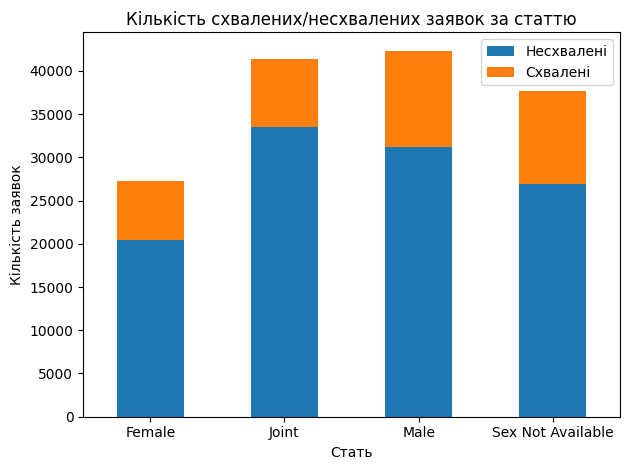

In [14]:
summary = df.groupby(['Gender', 'Status']).size().unstack(fill_value=0)

summary.plot(kind='bar', stacked=True)
plt.title('Кількість схвалених/несхвалених заявок за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість заявок')
plt.xticks(rotation=0)
plt.legend(['Несхвалені', 'Cхвалені'])
plt.tight_layout()
plt.show()

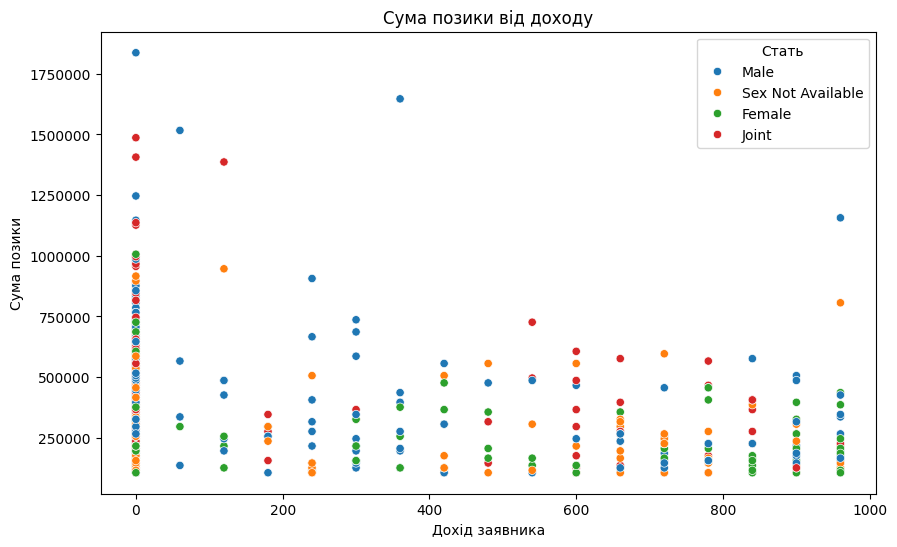

In [15]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

filtered_df = df[(df['income'] < 1000) & (df['loan_amount'] > 100_000)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x=df['income'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Дохід заявника')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

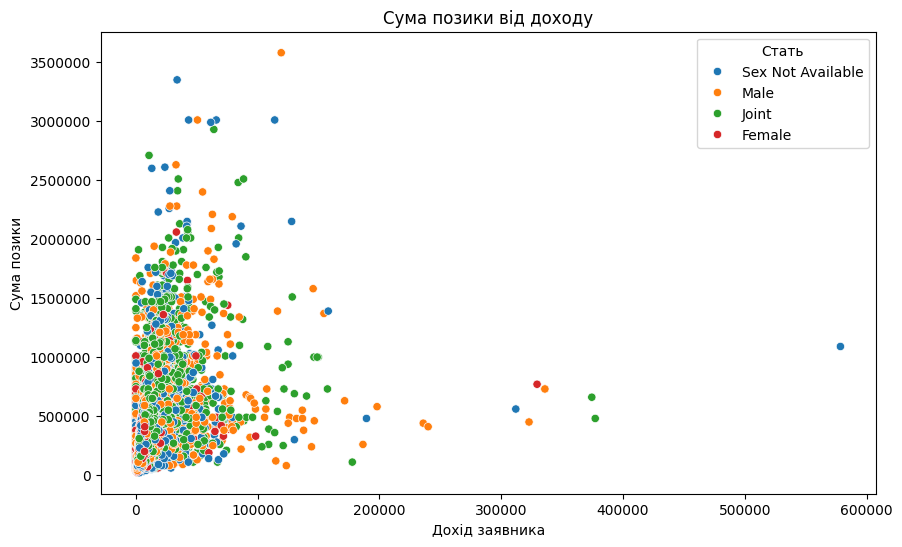

In [16]:
def thousands_formatter(x, pos):
    return f'{int(x)}'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['income'], y=df['loan_amount'], hue='Gender')
plt.title('Сума позики від доходу')
plt.xlabel('Дохід заявника')
plt.ylabel('Сума позики')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(title='Стать')
plt.show()

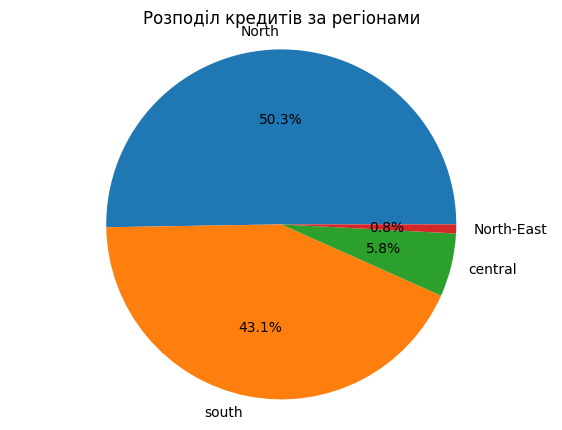

In [17]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Розподіл кредитів за регіонами')
plt.axis('equal')
plt.show()

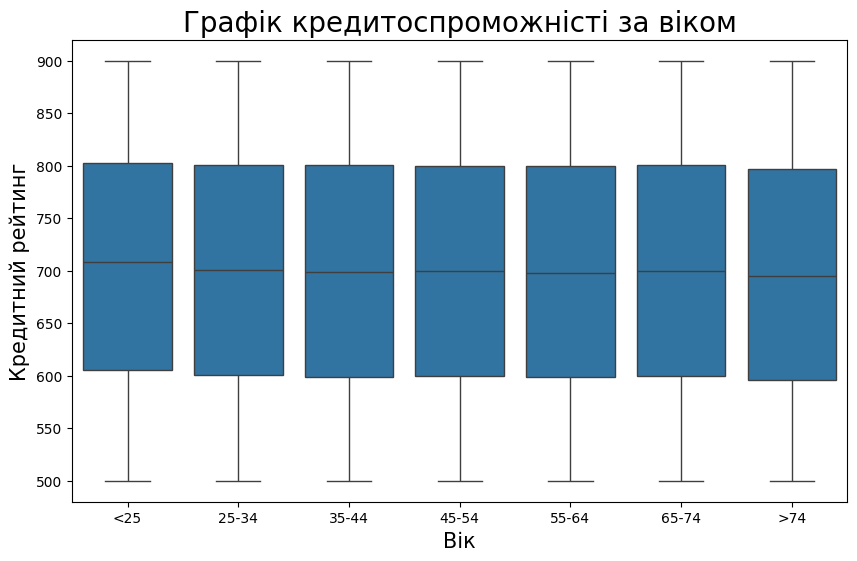

In [18]:
order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
df['age'] = pd.Categorical(df['age'], categories=order, ordered=True)

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, y='Credit_Score', x='age')
plt.title("Графік кредитоспроможністі за віком", fontsize=20)
plt.ylabel("Кредитний рейтинг", fontsize=15)
plt.xlabel("Вік", fontsize=15)
plt.show()

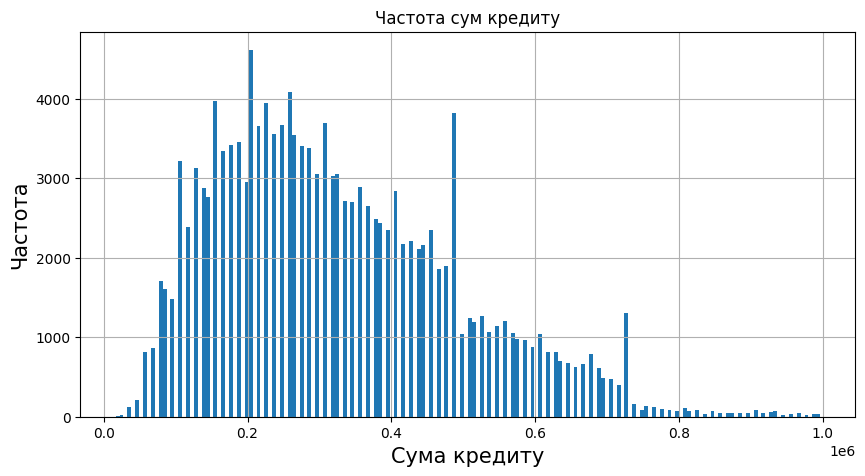

In [19]:
filtered_ds = df[df['loan_amount'] < 1_000_000]
filtered_ds[['loan_amount']].hist(bins=180, figsize=(10, 5))
plt.title('Частота сум кредиту')
plt.xlabel("Сума кредиту", fontsize=15)
plt.ylabel("Частота", fontsize=15)
plt.show()